<a href="https://colab.research.google.com/github/DariaGoncharevskaia/task/blob/main/Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers sentencepiece

In [2]:
from transformers import pipeline

In [3]:
translator = pipeline("translation_en_to_ru", model="facebook/wmt19-en-ru")

In [4]:
from pprint import pprint

In [5]:
from sklearn.datasets import fetch_20newsgroups
data_test = fetch_20newsgroups(subset='test', categories=None, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
data_test = data_test['data'][:100]
#for el in data_test:
 # print(el)
data_test

['I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.',
 'I\'m not familiar at all with the format of these "X-Face:" thingies, but\nafter seeing them in some folks\' headers, I\'ve *got* to *see* them (and\nmaybe make one of my own)!\n\nI\'ve got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")\nand I\'ve managed to compile [un]compface too... but now that I\'m *looking*\nfor them, I can\'t seem to find any X-Face:\'s in anyones news headers!  :-(\n\nCould you, would you, please send me your "X-Face:" header?\n\nI *know* I\'ll probably get a little swamped, but

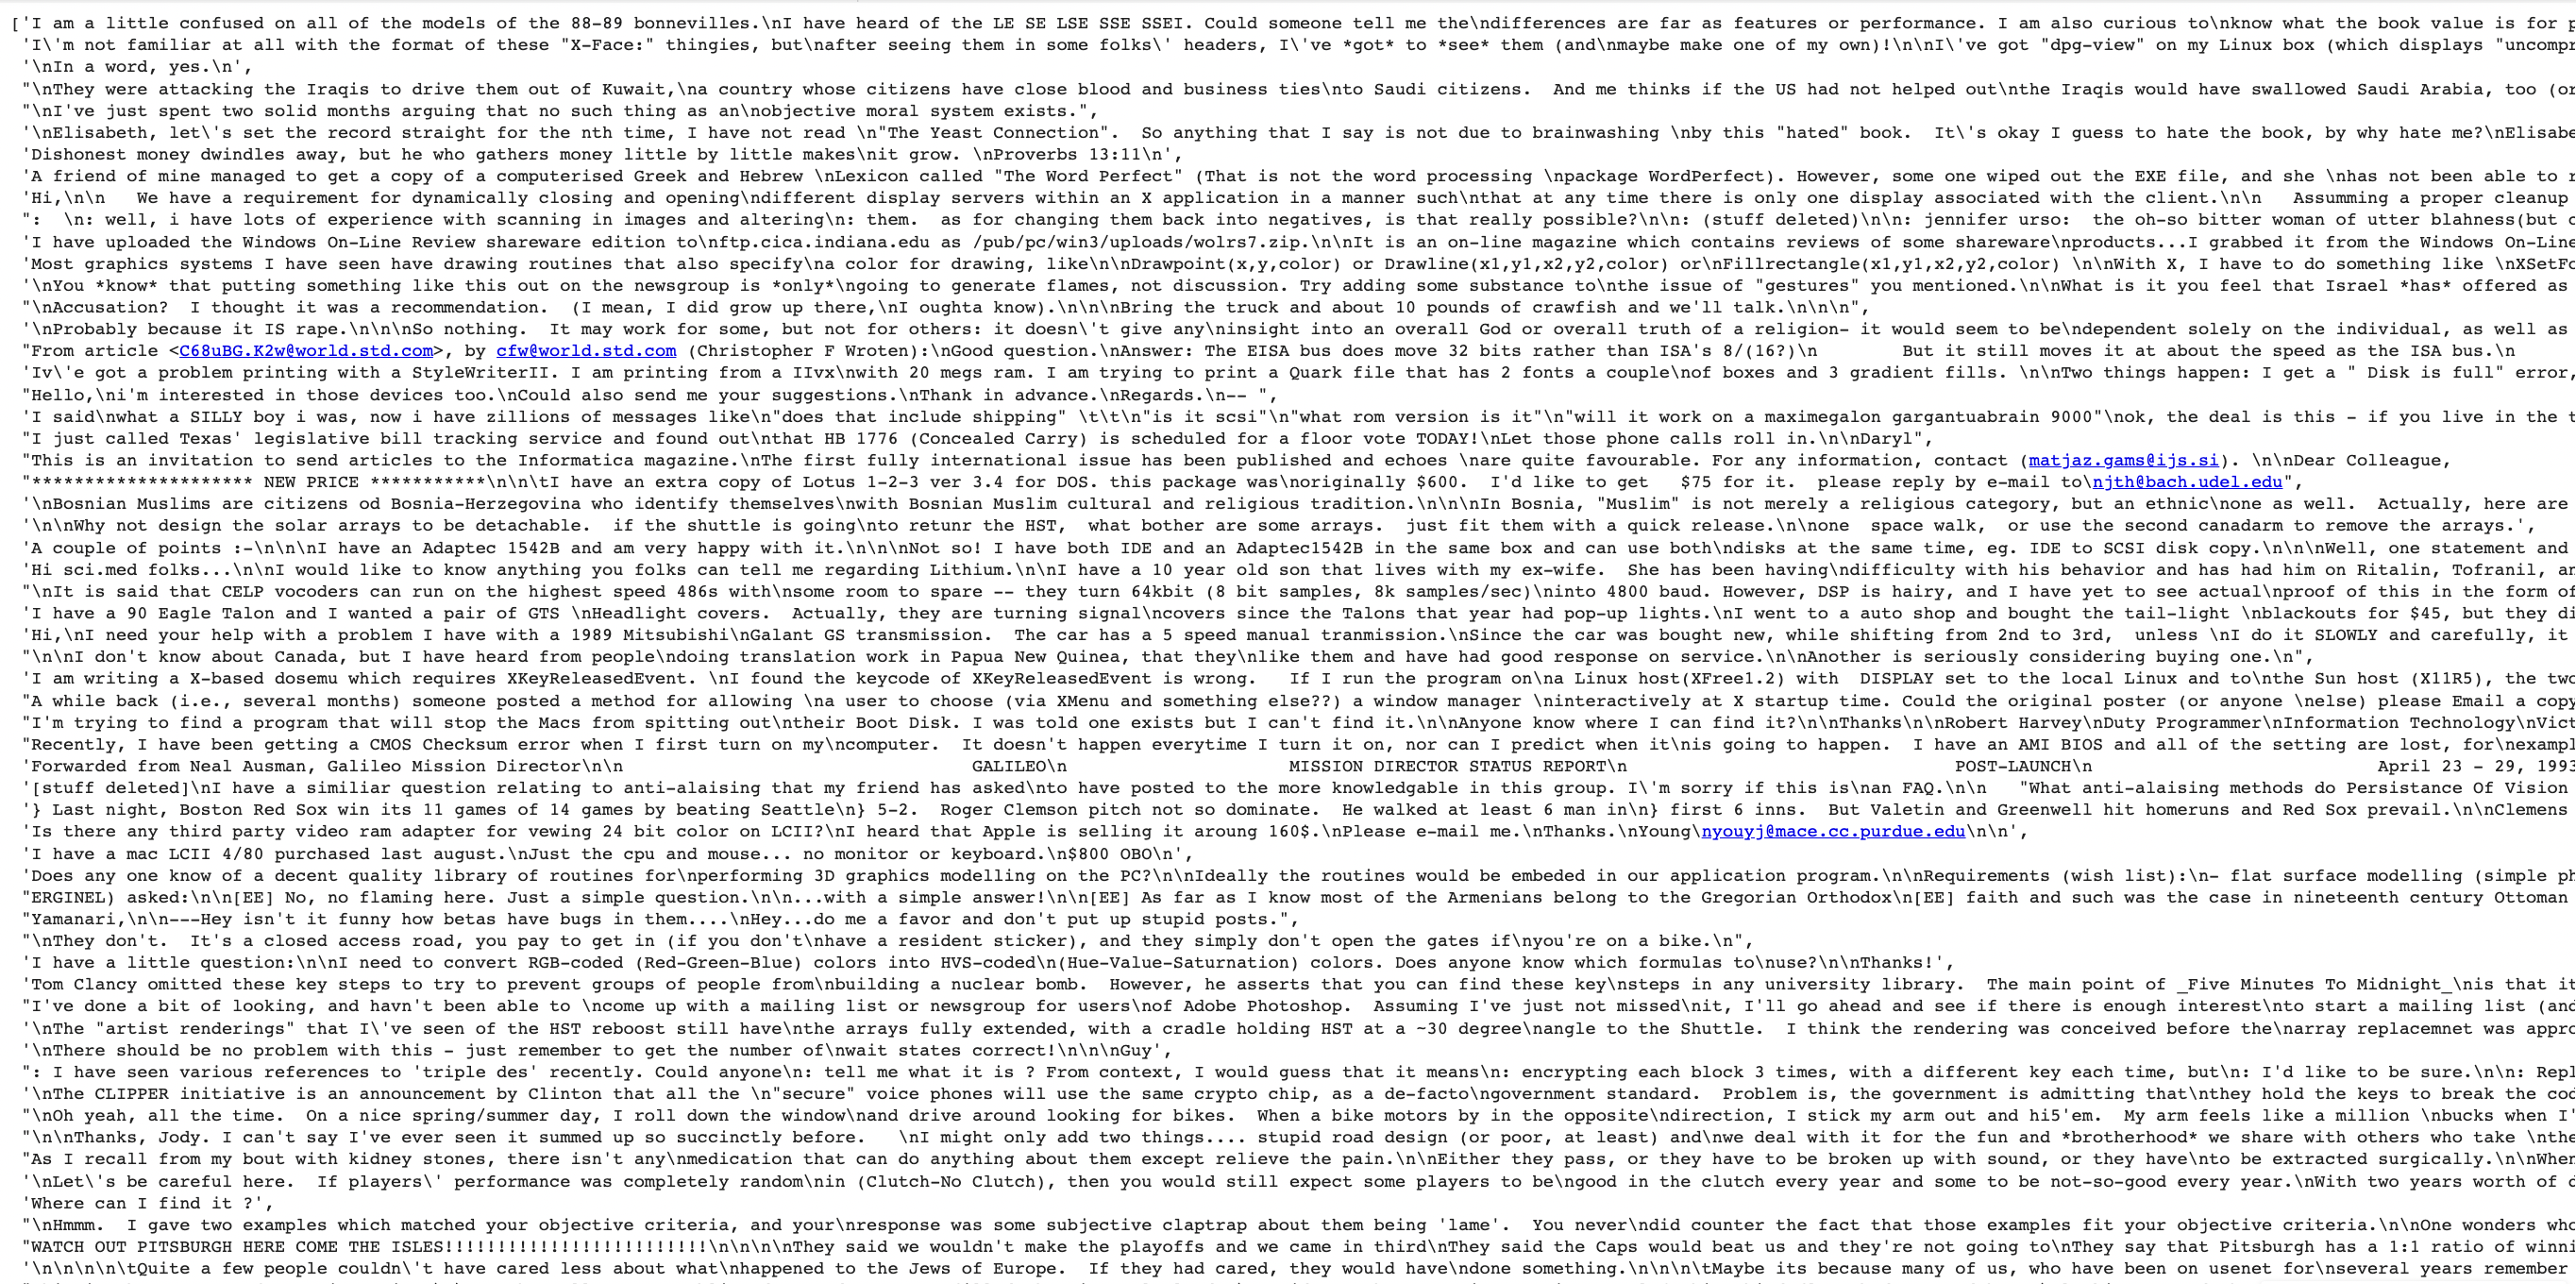

In [22]:
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

lst = []
for el in data_test:
  el = split_into_sentences(el)
  lst.extend(el)

lst = lst[:100]
print(lst)

['I am a little confused on all of the models of the 88-89 bonnevilles.', 'I have heard of the LE SE LSE SSE SSEI.', 'Could someone tell me the differences are far as features or performance.', 'I am also curious to know what the book value is for prefereably the 89 model.', 'And how much less than book value can you usually get them for.', 'In other words how much are they in demand this time of year.', 'I have heard that the mid-spring early summer is the best time to buy.', 'I\'m not familiar at all with the format of these "X-Face:" thingies, but after seeing them in some folks\' headers, I\'ve *got* to *see* them (and maybe make one of my own)!', 'I\'ve got "dpg-view" on my Linux box (which displays "uncompressed X-Faces") and I\'ve managed to compile [un]compface too.', '.', '.', "but now that I'm *looking* for them, I can't seem to find any X-Face:'s in anyones news headers!", ':-(  Could you, would you, please send me your "X-Face:" header?', "I *know* I'll probably get a littl

In [23]:
results = []
for el in lst:
  result = translator(el)
  results.append(result)

In [24]:
results

[[{'translation_text': 'Меня немного смущают все модели бонневилей 88-89.'}],
 [{'translation_text': 'Я слышал о SSEI LE SE LSE.'}],
 [{'translation_text': 'Мог бы кто-нибудь сказать мне, что различия связаны с особенностями или производительностью.'}],
 [{'translation_text': 'Мне также любопытно узнать, какова балансовая стоимость модели 89.'}],
 [{'translation_text': 'И насколько меньше, чем балансовая стоимость, вы обычно можете получить за них.'}],
 [{'translation_text': 'Другими словами, насколько они востребованы в это время года.'}],
 [{'translation_text': 'Слышал, что середина весны - начало лета - лучшее время для покупок.'}],
 [{'translation_text': 'Я вообще не знаком с форматом этих мыслей "X-Face:", но после того, как я увидел их в некоторых фольклорных хитрах, я * должен * * увидеть * их (и, возможно, сделать один из них своим)!'}],
 [{'translation_text': 'У меня есть "dpg-view" на моем Linux box (который отображает "uncompressed X-Faces"), и мне удалось скомпилировать [un

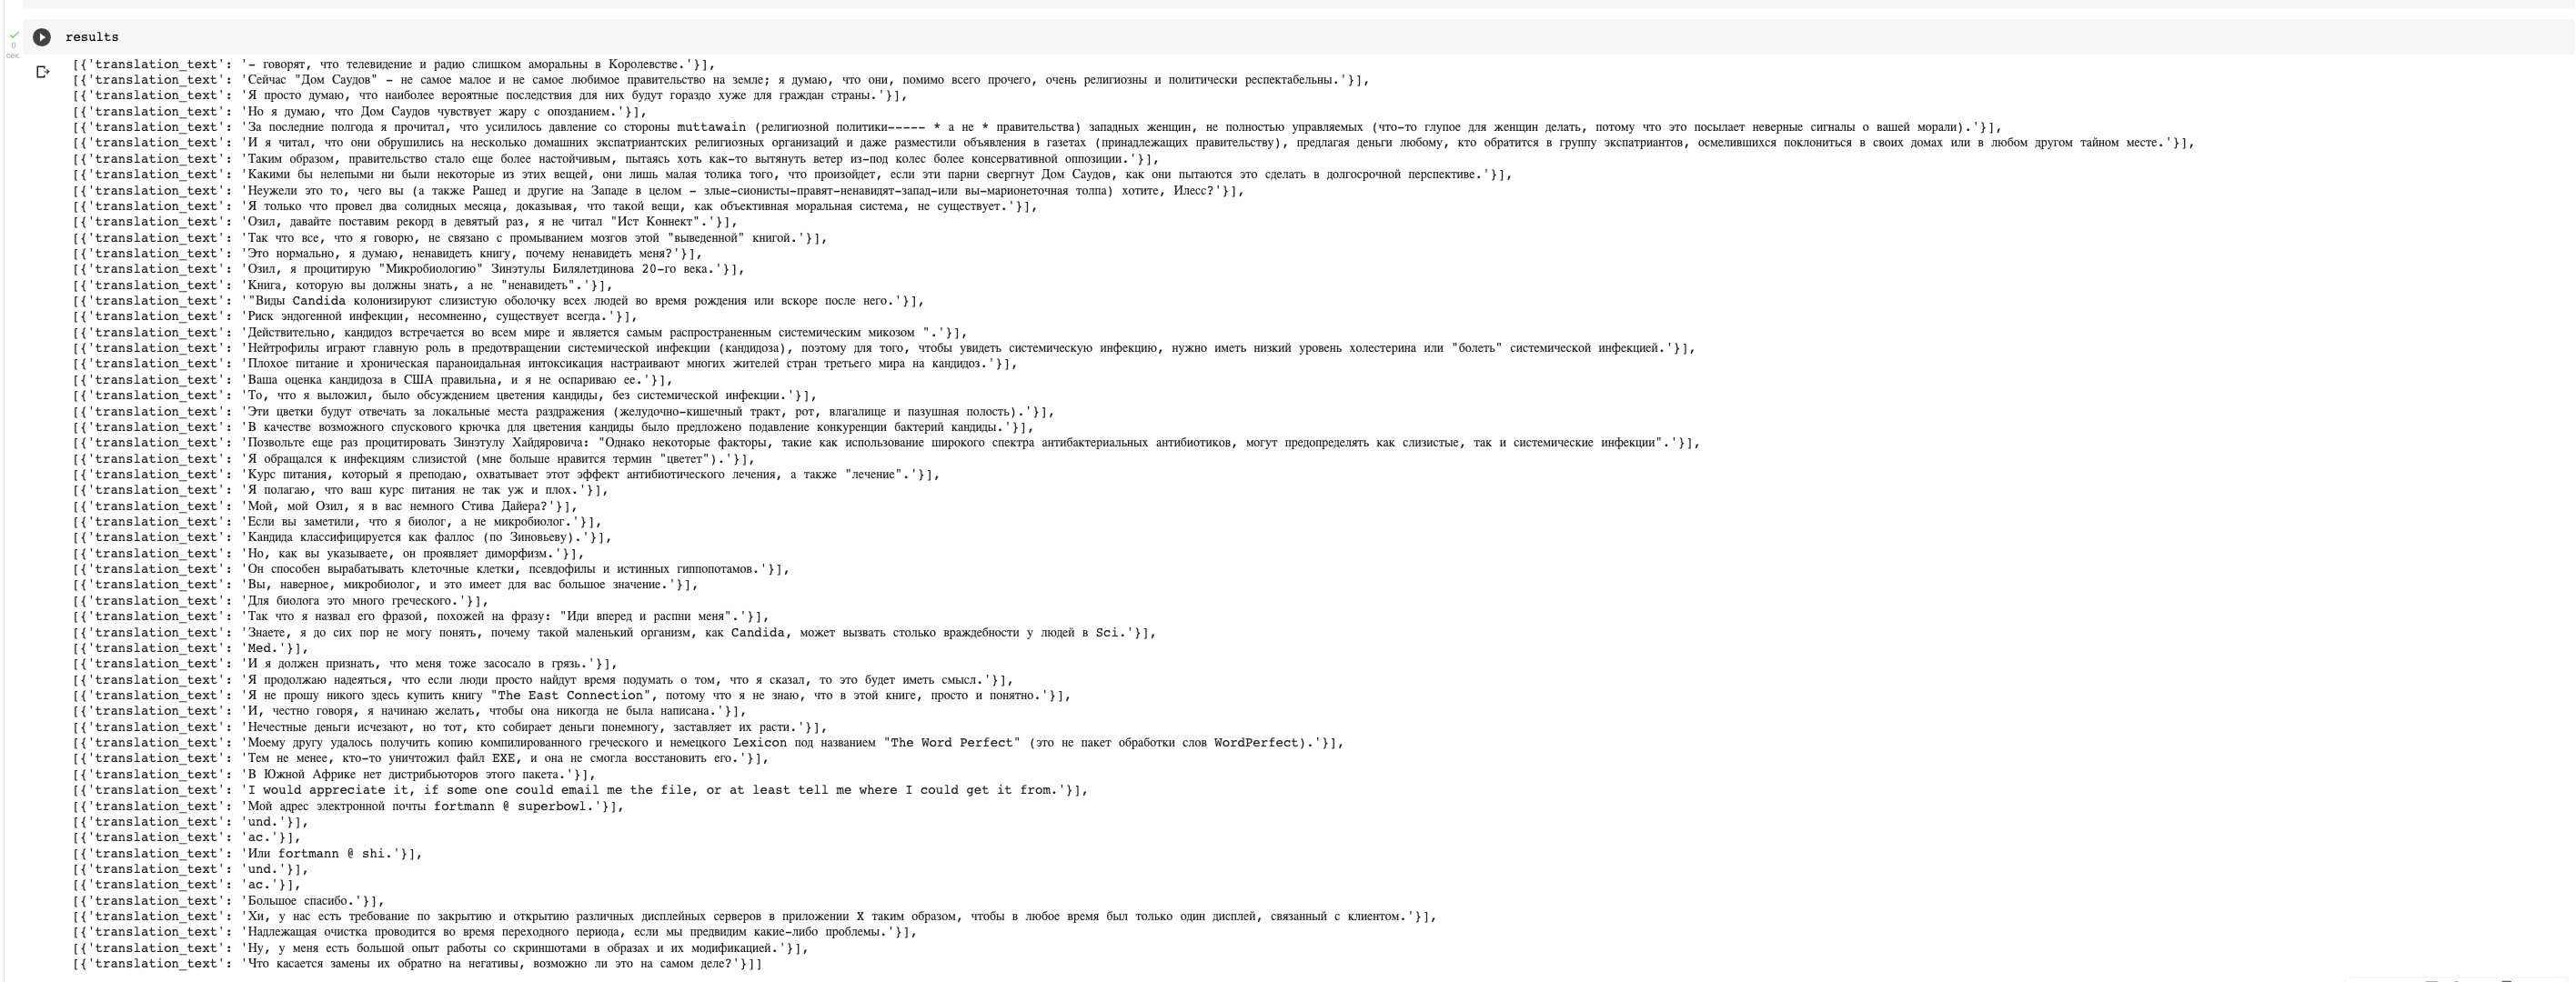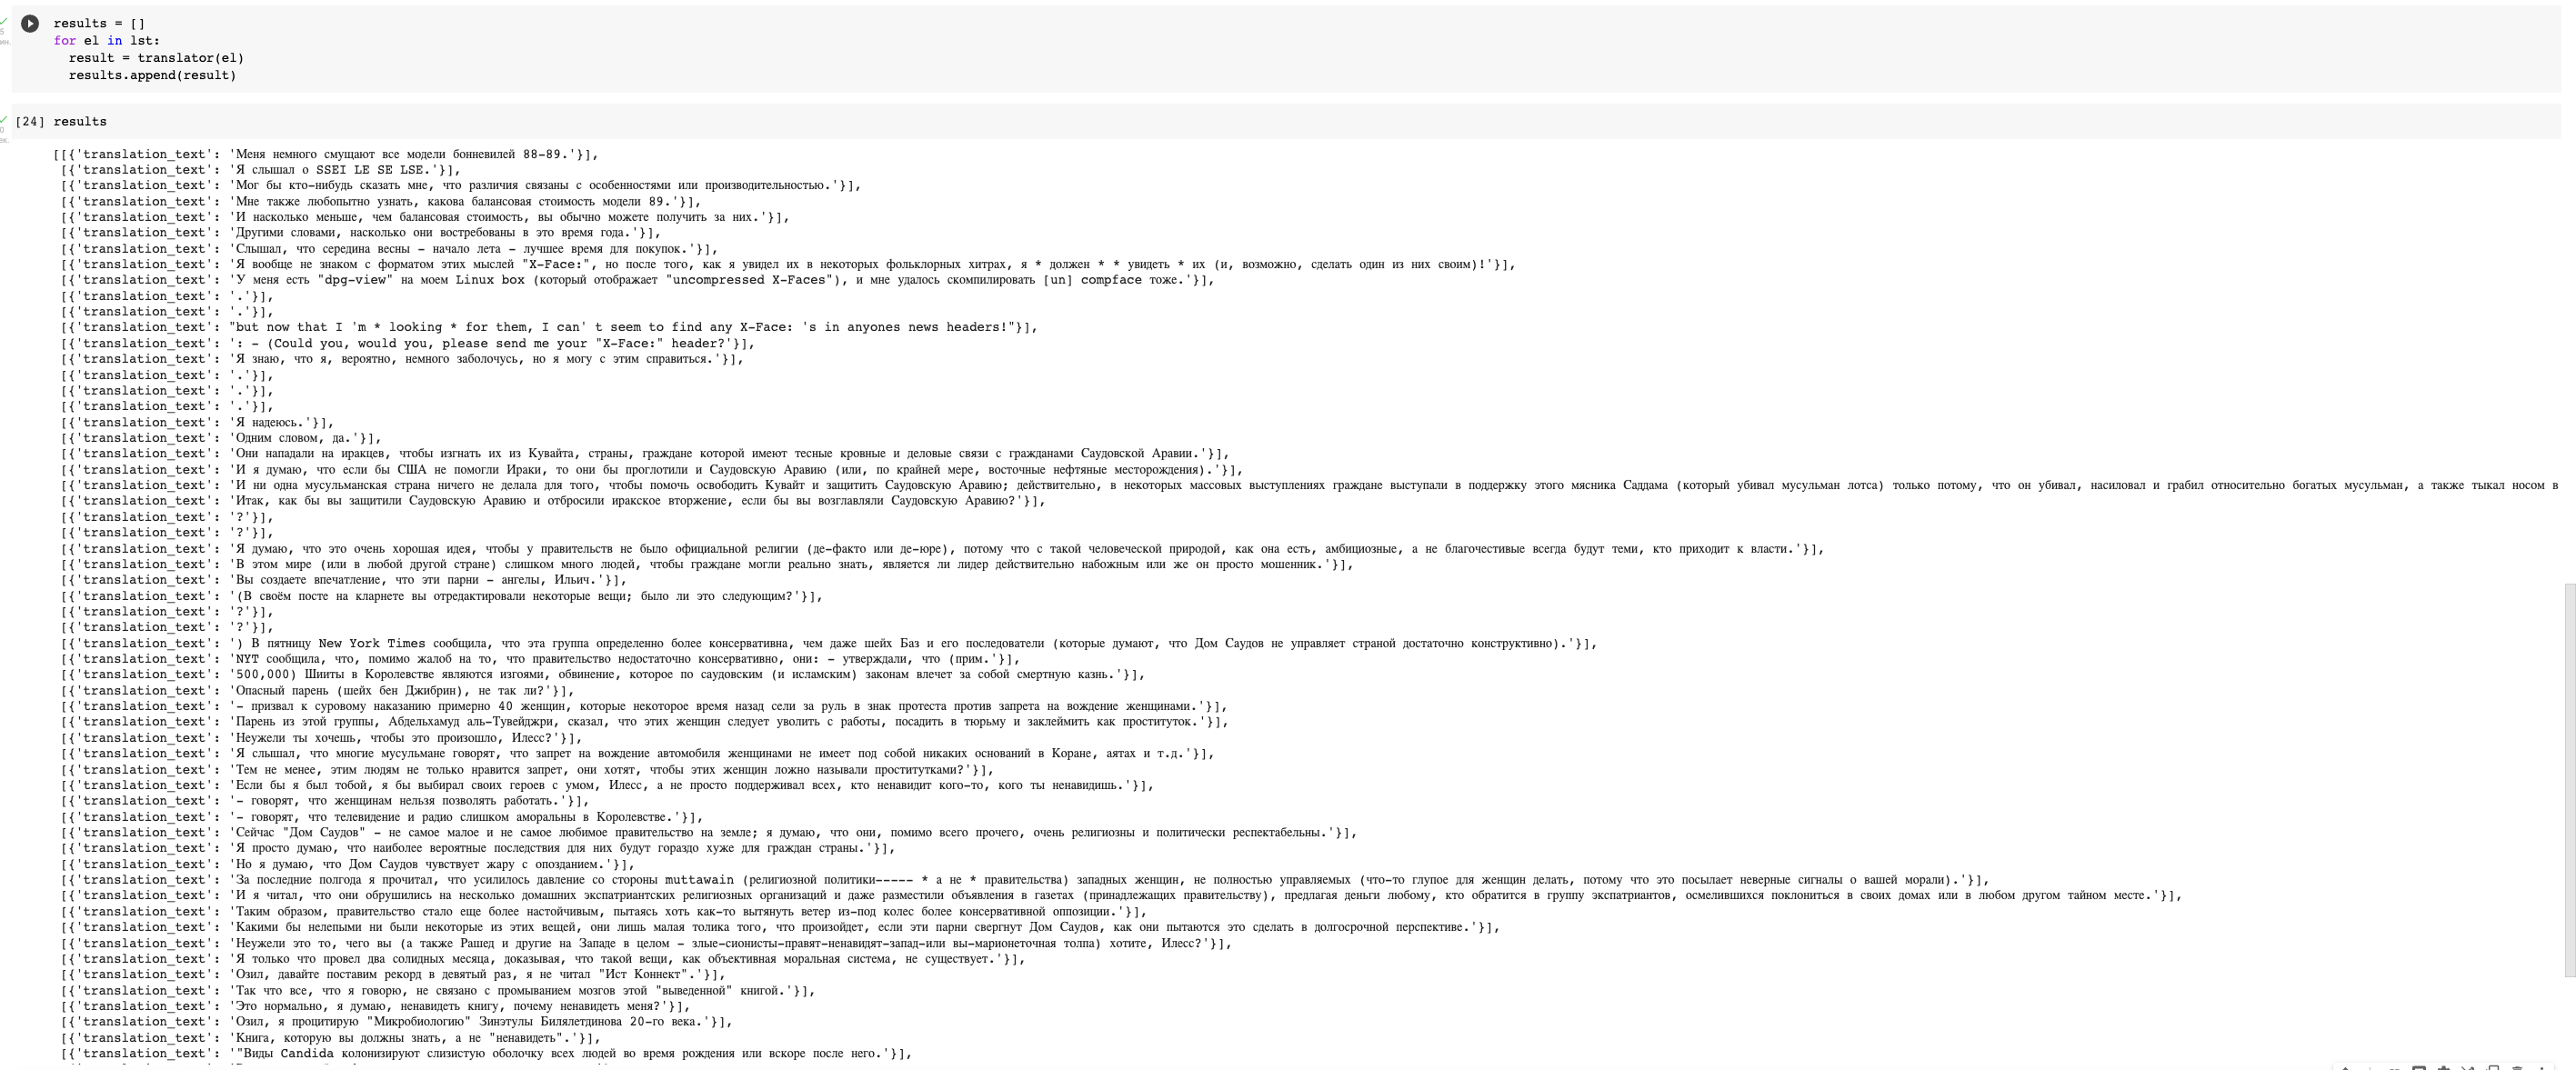